In [5]:
import pandas as pd

In [6]:
csv_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv'

In [7]:
original_df = pd.read_csv(csv_url)
original_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [8]:
# Here LabelEncoder is used to encode cbwd column to integers (It was string before)
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
original_df.cbwd = le.fit_transform(original_df.cbwd)
#
# Print df.head for checking the transformation
#

In [9]:
original_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,1,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,1,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,1,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,1,246.72,0,0


In [10]:
# Checking if there are Null or Nan cells
output = original_df['pm2.5']
print(output)
output.isnull().sum()

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
43819     8.0
43820    10.0
43821    10.0
43822     8.0
43823    12.0
Name: pm2.5, Length: 43824, dtype: float64


2067

In [11]:
#Filling the Nan or missing values with the mean
output.fillna(value=output.mean(),inplace=True)

In [12]:
# Setting output variable / target variable
output = original_df['pm2.5']
print(output)
output.isnull().sum()

0        98.613215
1        98.613215
2        98.613215
3        98.613215
4        98.613215
           ...    
43819     8.000000
43820    10.000000
43821    10.000000
43822     8.000000
43823    12.000000
Name: pm2.5, Length: 43824, dtype: float64


0

In [13]:
# Setting input variable
df = original_df[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
df

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,-22,-4.0,1034.0,1,246.72,0,0


In [14]:
df.duplicated().any()

False

In [15]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [16]:
df

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,-22,-4.0,1034.0,1,246.72,0,0


In [17]:
df.shape

(43824, 11)

In [18]:
 # year, month, days and hour columns represents a date, so we can not give them directly to model. Here I concatenate these columns to one column of date 
 
 #create a datetime column using the year,month,day and hour columns.
years = df['year'].values
months = df['month'].values
days = df['day'].values
hours = df['hour'].values
full_date = []

for i in range(df.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)

dates = pd.DataFrame(dates,columns=['date'])
#dates['ts'] = dates.apply(lambda x: x[0].timestamp(), axis=1).astype(int)

#dates = dates.drop('date',axis=1)
data = pd.concat([dates,df],axis=1)

data = data.drop(['year', 'month', 'day', 'hour'],axis=1)
data


,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,-21,-11.0,1021.0,1,1.79,0,0
1,2010-01-01 01:00:00,-21,-12.0,1020.0,1,4.92,0,0
2,2010-01-01 02:00:00,-21,-11.0,1019.0,1,6.71,0,0
3,2010-01-01 03:00:00,-21,-14.0,1019.0,1,9.84,0,0
4,2010-01-01 04:00:00,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,-23,-2.0,1034.0,1,231.97,0,0
43820,2014-12-31 20:00:00,-22,-3.0,1034.0,1,237.78,0,0
43821,2014-12-31 21:00:00,-22,-3.0,1034.0,1,242.70,0,0
43822,2014-12-31 22:00:00,-22,-4.0,1034.0,1,246.72,0,0


In [19]:
#Sorted all the data according to date column (ascending order)
data = data.sort_values("date")

In [20]:
data

,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,-21,-11.0,1021.0,1,1.79,0,0
1,2010-01-01 01:00:00,-21,-12.0,1020.0,1,4.92,0,0
2,2010-01-01 02:00:00,-21,-11.0,1019.0,1,6.71,0,0
3,2010-01-01 03:00:00,-21,-14.0,1019.0,1,9.84,0,0
4,2010-01-01 04:00:00,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,-23,-2.0,1034.0,1,231.97,0,0
43820,2014-12-31 20:00:00,-22,-3.0,1034.0,1,237.78,0,0
43821,2014-12-31 21:00:00,-22,-3.0,1034.0,1,242.70,0,0
43822,2014-12-31 22:00:00,-22,-4.0,1034.0,1,246.72,0,0


In [21]:
# We can not directly give the date column to the model as it does not accept Type(timestamp), so we need to convert the date column to index, So the model will be able to detect it's timestamp
data = data.set_index('date')


In [22]:
# Now the indexes are replaced by date column
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2010-01-01 00:00:00,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,-22,-3.0,1034.0,1,242.70,0,0


In [23]:
#data = data.iloc[:,1:]
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2010-01-01 00:00:00,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-23,-2.0,1034.0,1,231.97,0,0
2014-12-31 20:00:00,-22,-3.0,1034.0,1,237.78,0,0
2014-12-31 21:00:00,-22,-3.0,1034.0,1,242.70,0,0


In [24]:
# Splting the data
from sklearn.model_selection import train_test_split


y = output
X = data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
X_test

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2011-09-16 14:00:00,9,21.0,1014.0,0,26.38,0,0
2013-10-21 11:00:00,2,15.0,1024.0,3,4.90,0,0
2010-03-26 10:00:00,-17,8.0,1021.0,2,3.13,0,0
2010-01-02 11:00:00,-8,-5.0,1026.0,2,20.56,0,0
2013-02-04 10:00:00,-14,-3.0,1033.0,1,4.02,0,0
...,...,...,...,...,...,...,...
2010-11-09 13:00:00,-8,8.0,1019.0,2,3.58,0,0
2010-02-19 20:00:00,-16,1.0,1015.0,3,0.89,0,0
2013-12-11 22:00:00,-19,1.0,1017.0,3,0.89,0,0


In [26]:
X_train

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2012-10-14 14:00:00,7,14.0,1020.0,3,56.07,0,0
2014-12-06 16:00:00,-18,2.0,1025.0,2,5.37,0,0
2013-10-11 12:00:00,-1,22.0,1015.0,2,9.84,0,0
2013-05-15 23:00:00,10,18.0,1018.0,2,36.66,0,0
2013-12-19 02:00:00,-18,-10.0,1030.0,1,9.39,0,0
...,...,...,...,...,...,...,...
2012-09-18 20:00:00,6,24.0,1008.0,2,6.71,0,0
2011-08-29 23:00:00,22,23.0,1010.0,3,0.89,0,0
2010-11-17 19:00:00,-1,3.0,1022.0,1,0.89,0,0


In [27]:
y_train

24422     34.000000
43216     71.000000
33108     28.000000
29543     39.000000
34754     18.000000
            ...    
23804     33.000000
14543    188.000000
7699     503.000000
33774    151.000000
23056     98.613215
Name: pm2.5, Length: 35059, dtype: float64

In [28]:
y_test

14966     19.0
33347    115.0
2026      37.0
35       152.0
27130     15.0
         ...  
7501      75.0
1196      65.0
34582     76.0
42961    299.0
35722     23.0
Name: pm2.5, Length: 8765, dtype: float64

In [29]:
X_train.shape

(35059, 7)

In [30]:
#train_data_reshaped.shape

In [31]:
X_train

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2012-10-14 14:00:00,7,14.0,1020.0,3,56.07,0,0
2014-12-06 16:00:00,-18,2.0,1025.0,2,5.37,0,0
2013-10-11 12:00:00,-1,22.0,1015.0,2,9.84,0,0
2013-05-15 23:00:00,10,18.0,1018.0,2,36.66,0,0
2013-12-19 02:00:00,-18,-10.0,1030.0,1,9.39,0,0
...,...,...,...,...,...,...,...
2012-09-18 20:00:00,6,24.0,1008.0,2,6.71,0,0
2011-08-29 23:00:00,22,23.0,1010.0,3,0.89,0,0
2010-11-17 19:00:00,-1,3.0,1022.0,1,0.89,0,0


In [32]:
X_train

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2012-10-14 14:00:00,7,14.0,1020.0,3,56.07,0,0
2014-12-06 16:00:00,-18,2.0,1025.0,2,5.37,0,0
2013-10-11 12:00:00,-1,22.0,1015.0,2,9.84,0,0
2013-05-15 23:00:00,10,18.0,1018.0,2,36.66,0,0
2013-12-19 02:00:00,-18,-10.0,1030.0,1,9.39,0,0
...,...,...,...,...,...,...,...
2012-09-18 20:00:00,6,24.0,1008.0,2,6.71,0,0
2011-08-29 23:00:00,22,23.0,1010.0,3,0.89,0,0
2010-11-17 19:00:00,-1,3.0,1022.0,1,0.89,0,0


In [33]:
X_train.isnull().sum()

DEWP    0
TEMP    0
PRES    0
cbwd    0
Iws     0
Is      0
Ir      0
dtype: int64

In [34]:
#X_train2 = X_train.values
#X_test = X_test.values
#X_train2.shape

In [35]:
#sample_size = X_train.shape[0] # number of samples in train set
#time_steps  = X_train.shape[1] # number of features in train set
#input_dimension = 1               # each feature is represented by 1 number

#train_data_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
#test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],input_dimension)
#print("After reshape train data set shape:\n", train_data_reshaped.shape)
#print("1 Sample shape:\n",train_data_reshaped[0].shape)
#print("An example sample:\n", train_data_reshaped[0])

In [36]:
#test_data_reshaped.shape

In [37]:
y_train.shape

(35059,)

In [38]:
X_test

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2011-09-16 14:00:00,9,21.0,1014.0,0,26.38,0,0
2013-10-21 11:00:00,2,15.0,1024.0,3,4.90,0,0
2010-03-26 10:00:00,-17,8.0,1021.0,2,3.13,0,0
2010-01-02 11:00:00,-8,-5.0,1026.0,2,20.56,0,0
2013-02-04 10:00:00,-14,-3.0,1033.0,1,4.02,0,0
...,...,...,...,...,...,...,...
2010-11-09 13:00:00,-8,8.0,1019.0,2,3.58,0,0
2010-02-19 20:00:00,-16,1.0,1015.0,3,0.89,0,0
2013-12-11 22:00:00,-19,1.0,1017.0,3,0.89,0,0


In [39]:
# Here normalization is performed, to normalize maximum values in the range of 0-1. neural network performs well on normalized data, less computational power is used and efficient.
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_test -= mean
X_test /= std


In [40]:
X_train

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2012-10-14 14:00:00,0.358227,0.128336,0.343821,1.425476,0.645663,-0.070172,-0.137275
2014-12-06 16:00:00,-1.371578,-0.855974,0.829845,0.359258,-0.371370,-0.070172,-0.137275
2013-10-11 12:00:00,-0.195311,0.784543,-0.142203,0.359258,-0.281703,-0.070172,-0.137275
2013-05-15 23:00:00,0.565803,0.456440,0.149411,0.359258,0.256302,-0.070172,-0.137275
2013-12-19 02:00:00,-1.371578,-1.840285,1.315869,-0.706960,-0.290729,-0.070172,-0.137275
...,...,...,...,...,...,...,...
2012-09-18 20:00:00,0.289035,0.948595,-0.822637,0.359258,-0.344490,-0.070172,-0.137275
2011-08-29 23:00:00,1.396109,0.866569,-0.628227,1.425476,-0.461238,-0.070172,-0.137275
2010-11-17 19:00:00,-0.195311,-0.773949,0.538230,-0.706960,-0.461238,-0.070172,-0.137275


In [41]:
X_test

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,
2011-09-16 14:00:00,0.496611,0.702517,-0.239408,-1.773177,0.050087,-0.070172,-0.137275
2013-10-21 11:00:00,0.012266,0.210362,0.732640,1.425476,-0.380798,-0.070172,-0.137275
2010-03-26 10:00:00,-1.302386,-0.363819,0.441026,0.359258,-0.416304,-0.070172,-0.137275
2010-01-02 11:00:00,-0.679656,-1.430156,0.927050,0.359258,-0.066661,-0.070172,-0.137275
2013-02-04 10:00:00,-1.094809,-1.266104,1.607484,-0.706960,-0.398451,-0.070172,-0.137275
...,...,...,...,...,...,...,...
2010-11-09 13:00:00,-0.679656,-0.363819,0.246616,0.359258,-0.407277,-0.070172,-0.137275
2010-02-19 20:00:00,-1.233193,-0.938000,-0.142203,1.425476,-0.461238,-0.070172,-0.137275
2013-12-11 22:00:00,-1.440770,-0.938000,0.052206,1.425476,-0.461238,-0.070172,-0.137275


In [42]:
y_train

24422     34.000000
43216     71.000000
33108     28.000000
29543     39.000000
34754     18.000000
            ...    
23804     33.000000
14543    188.000000
7699     503.000000
33774    151.000000
23056     98.613215
Name: pm2.5, Length: 35059, dtype: float64

In [43]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam

#n_timesteps = train_data_reshaped.shape[1] #13
#n_features  = train_data_reshaped.shape[2] #1 

model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=(7,1)))


 
model.add(keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', name="Conv1D_1")) # Here filters represents the number of output filter this layer will produce.
model.add(keras.layers.Dropout(0.2)) # Drop out 0.2% information, a technique for optimization
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_3"))

model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D")) # MaxPooling layer is used to downsize the filters received from Conv1D layer, it selects the data with maximum information
#model.add(keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_2"))
#model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))
#model.add(keras.layers.MaxPooling1D(pool_size=1, name="MaxPooling1D"))

model.add(keras.layers.Flatten()) #before sending the data to Dense layer, we need to flatten the data

model.add(keras.layers.Dense(64, activation='relu', name="Dense_1")) # Here 64 is the number of neurons used in the layer
model.add(keras.layers.Dense(1, name="Dense_2")) # Here 1 represents the number of output, in this case only one output and no activation function is used becuase of regression problem

In [44]:
model.summary()
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])
    
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 5, 16)             64        
                                                                 
 dropout (Dropout)           (None, 5, 16)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             1568      
                                                                 
 Conv1D_3 (Conv1D)           (None, 1, 32)             3104      
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 32)            0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 Dense_1 (Dense)             (None, 64)                2

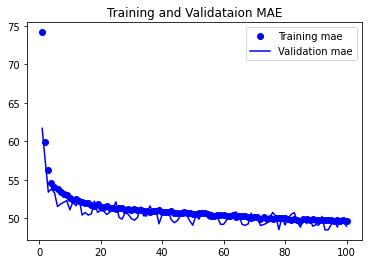

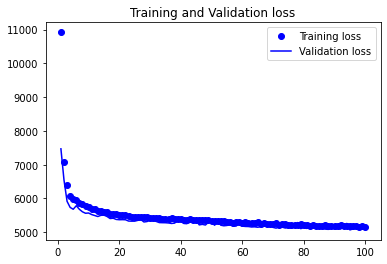

In [45]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and Validataion MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [46]:
print('Actual Values: ',y_test,'\n','Predicted Values: ', model.predict(X_test),'\n The difference in the values is almost 50 which is mae')

Actual Values:  14966     19.0
33347    115.0
2026      37.0
35       152.0
27130     15.0
         ...  
7501      75.0
1196      65.0
34582     76.0
42961    299.0
35722     23.0
Name: pm2.5, Length: 8765, dtype: float64 
 Predicted Values:  [[ 40.555946]
 [ 87.505875]
 [ 73.96958 ]
 ...
 [ 74.35352 ]
 [241.16826 ]
 [ 59.205376]] 
 The difference in the values is almost 50 which is mae


In [47]:
model.evaluate(X_test, y_test)

274/274 [==============================] - 1s 3ms/step - loss: 4811.6548 - mae: 48.4643


[4811.65478515625, 48.46425247192383]

In [48]:
predicted_value = model.predict(X_test)

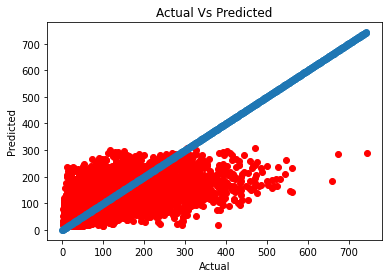

In [49]:
import matplotlib.pyplot as plt

y_pred = predicted_value
if max(y_test) >= max(y_pred):
  my_range = int(max(y_test))
else:
  my_range = int(max(y_pred))
plt.scatter(y_test, y_pred, color='red')
plt.plot(range(my_range), range(my_range), 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')
plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# dataset path
file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv'

# read the csv file into a pandas DataFrame
data = pd.read_csv(file)
data.head()
# drop the unwanted columns/features
cols_to_drop = ['No']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()
# check for duplicate and null values
print('any duplicated values in data ? : {}\n'.format(data.duplicated().any()))
print('Total number of null values in each colum:')
display(data.isnull().sum())
# find the mode of  wind direction value
data.cbwd.mode()
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)

# replace the missing values in wind direction with the modal value
data.cbwd.fillna(value='NE',inplace=True)

# Checking the data again for any missing values
data.isnull().any()
# create a datetime column
years = data['year'].values
months = data['month'].values
days = data['day'].values
hours = data['hour'].values
full_date = []

for i in range(data.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
data = pd.concat([dates,data],axis=1)

data.head()
cols_to_drop = ['date','year','month','day','hour','cbwd']



newdata = data.drop(cols_to_drop,axis=1)

newdata['pm2.5'] = np.log(newdata['pm2.5'])
newdata
# we split the data into predictor variables and Outcome variable
X = newdata.drop('pm2.5',axis=1)
y = newdata['pm2.5']

# le = preprocessing.LabelEncoder()
# le.fit(X["cbwd"])

# X["cbwd"] = le.transform(X["cbwd"])


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled values
X_scaled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB
any duplicated values in data ? : False

Total number of null values in each colum:


year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,DEWP,TEMP,PRES,Iws,Is,Ir
0,0.279412,0.131148,0.545455,0.002290,0.0,0.0
1,0.279412,0.114754,0.527273,0.007639,0.0,0.0
2,0.279412,0.131148,0.509091,0.010698,0.0,0.0
3,0.279412,0.081967,0.509091,0.016047,0.0,0.0
4,0.294118,0.114754,0.490909,0.021396,0.0,0.0


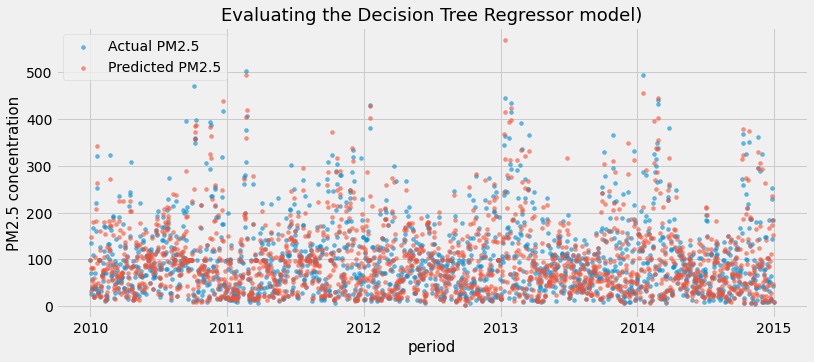

In [51]:

# (DecisionRegressor model) to predict the PM2.5 
# visualization

compare_data = pd.DataFrame({'dates':data['date'],
                            'Actual PM2.5':y_test,
                            'Predicted PM2.5':y_train})

compare_data.set_index('dates',inplace=True)
compare_data['Predicted PM2.5'] = np.round(compare_data['Predicted PM2.5'],1)

# let's plot the daily averages of the Actual PM10 and the predicted PM2.5 concentration.
compare_data = compare_data.resample('D').mean()

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(12,5))
    plt.scatter(compare_data.index,compare_data['Actual PM2.5'],s=15,label='Actual PM2.5',
               alpha=.6)
    plt.scatter(compare_data.index,compare_data['Predicted PM2.5'],s=15,label='Predicted PM2.5',
               alpha=.6)
    plt.legend()
    plt.title('Evaluating the Decision Tree Regressor model)',
             fontsize=18)
    plt.xlabel('period',fontsize=15)
    plt.ylabel('PM2.5 concentration',fontsize=15)
    plt.show()